In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    df = pd.read_csv('../data/interim/cleaned.csv')
    print("Datensatz geladen")
except:
    print("Datensatz konnte nicht geladen werden")

Datensatz geladen


In [ ]:
# Datenstruktur anzeigen
print(df.head())
print(df.columns)

## Exploration

In [4]:
# Länge der Zusammenfassung und des Urteils für spätere Bereinigung berechnen
df['summary_length'] = df['summary'].str.len()
df['judgement_length'] = df['judgement'].str.len()
print(df[['summary_length', 'judgement_length']].describe())

       summary_length  judgement_length
count     6432.000000       6432.000000
mean      4701.796331      34972.162935
std       3271.605404      35324.424070
min        330.000000        959.000000
25%       2736.000000      16647.000000
50%       3744.500000      26103.500000
75%       5526.750000      40702.500000
max      41126.000000     746154.000000



Verteilung der Fälle nach Jahr:


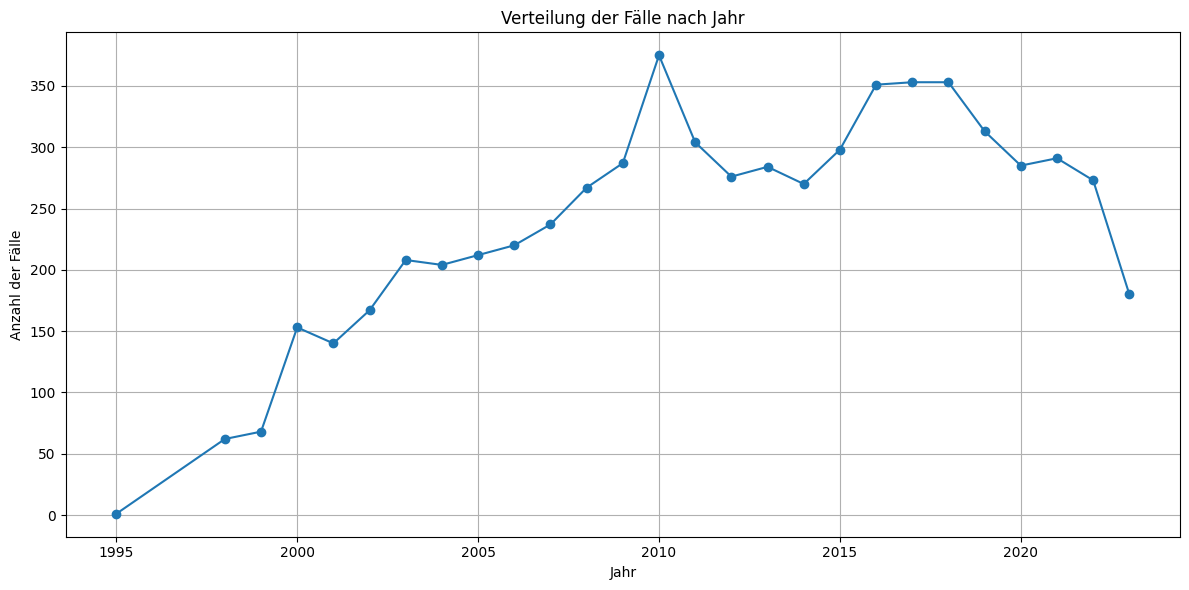

In [6]:
# Verteilung nach Jahren ansehen
df['year'] = df['date'].str.extract(r'(\d{4})').astype(int)
year_counts = df['year'].value_counts().sort_index()
print("\nVerteilung der Fälle nach Jahr:")
# print(year_counts) 
plt.figure(figsize=(12, 6))
year_counts.plot(kind='line', marker='o')
plt.title('Verteilung der Fälle nach Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Fälle')
plt.grid(True)
plt.tight_layout()
plt.show()

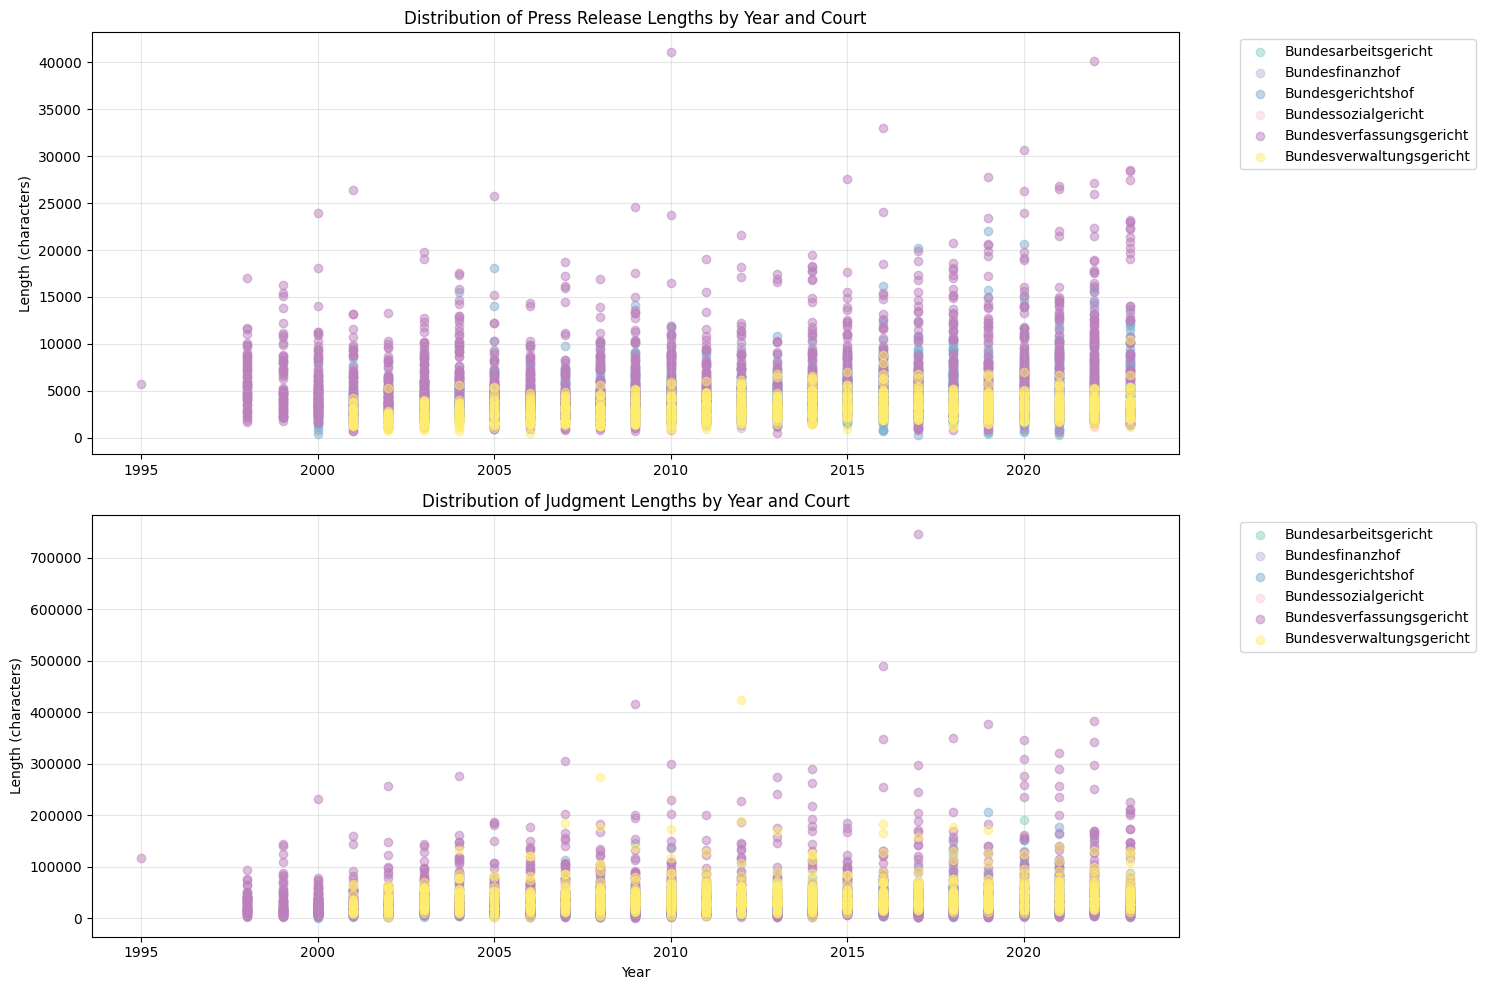

In [7]:
# Create scatter plots for summary and judgement lengths
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Get unique courts for color mapping
courts = df['subset_name'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(courts)))

# Plot summary lengths
for court, color in zip(courts, colors):
  mask = df['subset_name'] == court
  ax1.scatter(df[mask]['year'], df[mask]['summary_length'], 
        label=court, alpha=0.5, color=color)

ax1.set_title('Distribution of Press Release Lengths by Year and Court')
ax1.set_ylabel('Length (characters)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot judgement lengths
for court, color in zip(courts, colors):
  mask = df['subset_name'] == court
  ax2.scatter(df[mask]['year'], df[mask]['judgement_length'], 
        label=court, alpha=0.5, color=color)

ax2.set_title('Distribution of Judgment Lengths by Year and Court')
ax2.set_xlabel('Year')
ax2.set_ylabel('Length (characters)')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Kurze Pressemitteilungen mit langen Urteilen finden (möglicherweise unvollständige Zusammenfassungen)
summary_judgement_ratio = df['summary_length'] / df['judgement_length']
unusual_ratio = df[(summary_judgement_ratio < 0.05) &
                   (df['judgement_length'] > 1000)]
print(
    f"Anzahl der Einträge mit sehr kurzer Pressemitteilung im Vergleich zum Urteil: {len(unusual_ratio)}")
if len(unusual_ratio) > 0:
    print("Beispiele für ungewöhnliche Verhältnisse:")
    print(unusual_ratio[['id', 'summary_length', 'judgement_length']].head(3))

Anzahl der Einträge mit sehr kurzer Pressemitteilung im Vergleich zum Urteil: 281
Beispiele für ungewöhnliche Verhältnisse:
           id  summary_length  judgement_length
2   bag_10-19            3843             92410
4   bag_11-20            3890            190350
14  bag_15-20            3157            131152
